In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'SimHei'
import warnings
warnings.filterwarnings('ignore')

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
connectionist_bench_sonar_mines_vs_rocks = fetch_ucirepo(id=151) 
  
# data (as pandas dataframes) 
X = connectionist_bench_sonar_mines_vs_rocks.data.features 
y = connectionist_bench_sonar_mines_vs_rocks.data.targets
class_names = list(set(y['class']))  # 类别名称
n_classes = len(class_names)

In [3]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"模型：{model_name}")
    print(classification_report(y_true, y_pred, target_names=class_names))

In [5]:
# 绘制混淆矩阵
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('预测值')
    plt.ylabel('真实值')
    # plt.title(f"{model_name} - 混淆矩阵")
    # 保存图片到img文件夹
    plt.savefig(f'img/sonar/{model_name}_confusion_matrix.png')
    plt.show()

In [6]:
# 绘制 ROC 曲线
def plot_roc_curve(y_true, y_score, model_name):
    # 将类标签二值化
    unique_labels = np.unique(y_true)
    label_to_one_hot = {label: np.where(unique_labels == label, 1, 0) for label in unique_labels}
    y_true_bin = np.array([label_to_one_hot[label] for label in y_true['class']])
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # 微平均 ROC 曲线
    fpr["micro"], tpr["micro"], _ = roc_curve(
        y_true_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='ROC 曲线 (AUC = {0:0.2f})'.format(
                 roc_auc["micro"]), linewidth=2)

    # 绘制每个类别的 ROC 曲线
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2,
                 label='{0} ROC 曲线 (AUC = {1:0.2f})'.format(
                     class_names[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('假阳性率')
    plt.ylabel('真正率')
    # plt.title(f'{model_name} - ROC 曲线')
    plt.savefig(f'img/sonar/{model_name}_roc_curve.png')
    plt.legend(loc="lower right")
    plt.show()

In [7]:
# 定义模型配置
models = [
    {'name': '线性可分 SVM', 'params': {'kernel': 'linear', 'C': 1e10, 'probability': True}},
    {'name': '线性 SVM', 'params': {'kernel': 'linear', 'C': 1.0, 'probability': True}},
    {'name': '2 次多项式核 SVM', 'params': {'kernel': 'poly', 'degree': 2, 'gamma': 'auto', 'probability': True}},
    {'name': '3 次多项式核 SVM', 'params': {'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'probability': True}},
    {'name': '高斯核 SVM', 'params': {'kernel': 'rbf', 'gamma': 'scale', 'probability': True}},
    {'name': 'Sigmoid 核 SVM', 'params': {'kernel': 'sigmoid', 'gamma': 'auto', 'probability': True}}
]

In [8]:
from sklearn.metrics.pairwise import laplacian_kernel

# 定义拉普拉斯核 SVM 模型配置
laplacian_model = {'name': '拉普拉斯核 SVM', 'params': {'kernel': 'precomputed', 'probability': True}}



模型：线性可分 SVM
              precision    recall  f1-score   support

           R       0.78      0.85      0.82        34
           M       0.81      0.72      0.76        29

    accuracy                           0.79        63
   macro avg       0.80      0.79      0.79        63
weighted avg       0.79      0.79      0.79        63



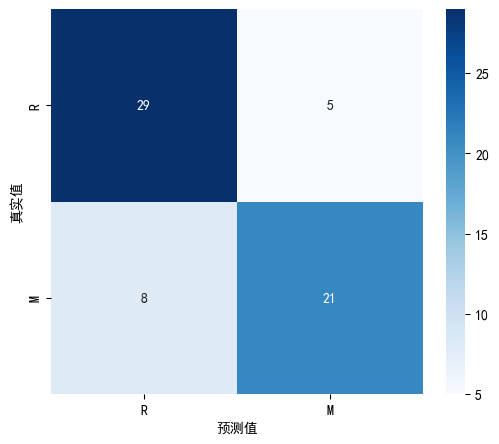

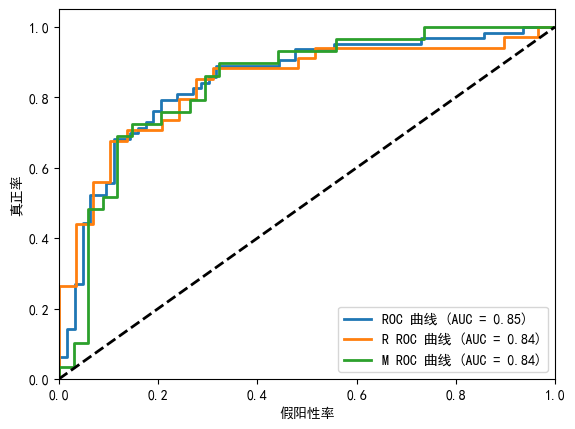



模型：线性 SVM
              precision    recall  f1-score   support

           R       0.77      0.71      0.74        34
           M       0.69      0.76      0.72        29

    accuracy                           0.73        63
   macro avg       0.73      0.73      0.73        63
weighted avg       0.73      0.73      0.73        63



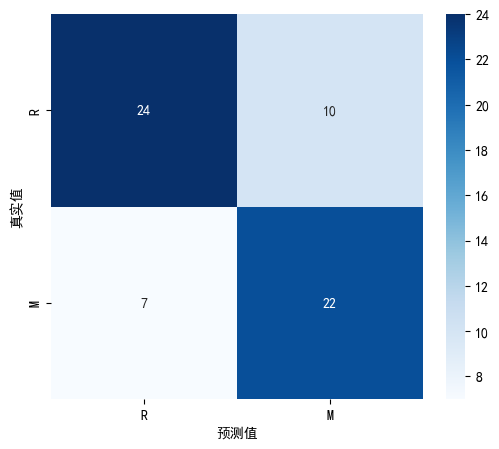

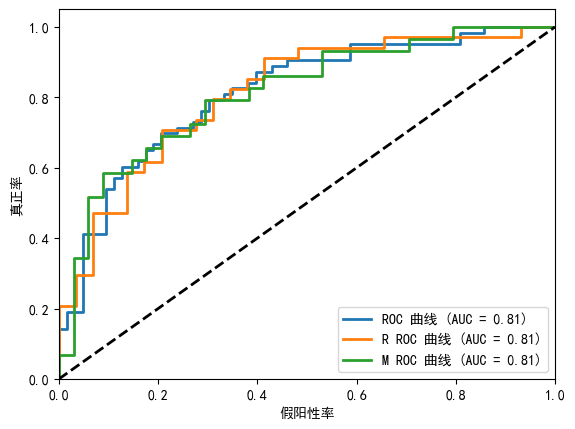



模型：2 次多项式核 SVM
              precision    recall  f1-score   support

           R       0.76      0.74      0.75        34
           M       0.70      0.72      0.71        29

    accuracy                           0.73        63
   macro avg       0.73      0.73      0.73        63
weighted avg       0.73      0.73      0.73        63



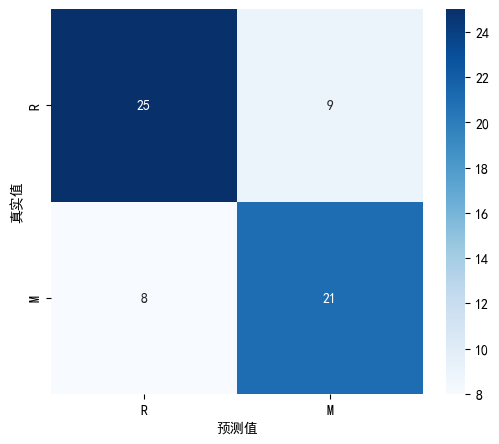

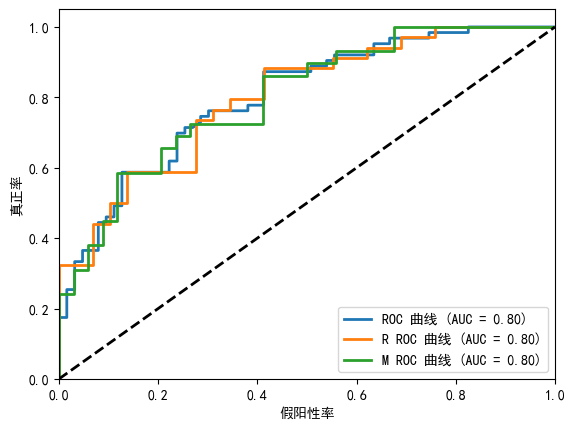



模型：3 次多项式核 SVM
              precision    recall  f1-score   support

           R       0.73      0.94      0.82        34
           M       0.89      0.59      0.71        29

    accuracy                           0.78        63
   macro avg       0.81      0.76      0.76        63
weighted avg       0.80      0.78      0.77        63



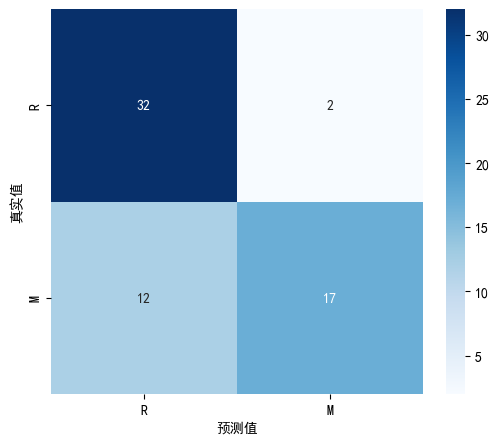

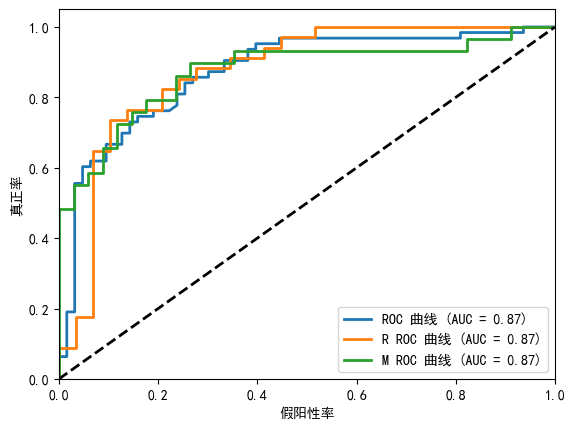



模型：高斯核 SVM
              precision    recall  f1-score   support

           R       0.77      0.88      0.82        34
           M       0.83      0.69      0.75        29

    accuracy                           0.79        63
   macro avg       0.80      0.79      0.79        63
weighted avg       0.80      0.79      0.79        63



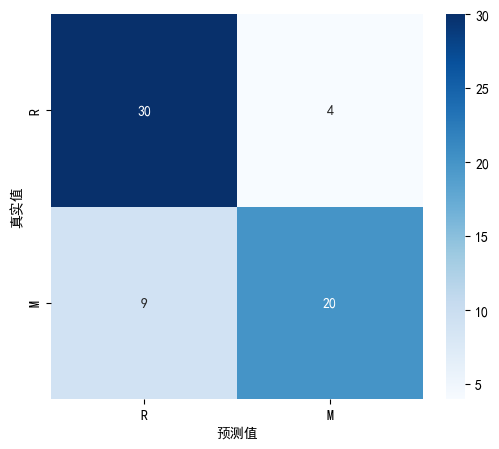

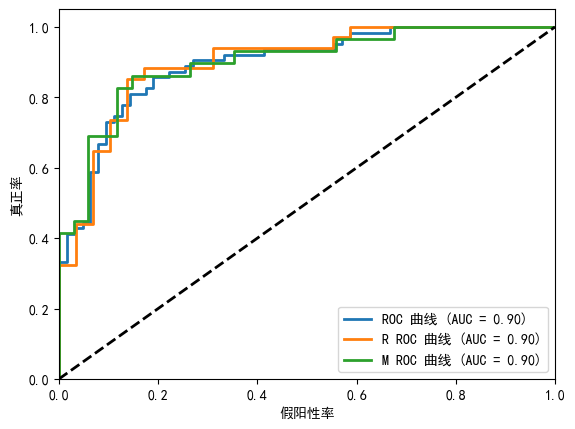



模型：Sigmoid 核 SVM
              precision    recall  f1-score   support

           R       0.76      0.85      0.81        34
           M       0.80      0.69      0.74        29

    accuracy                           0.78        63
   macro avg       0.78      0.77      0.77        63
weighted avg       0.78      0.78      0.78        63



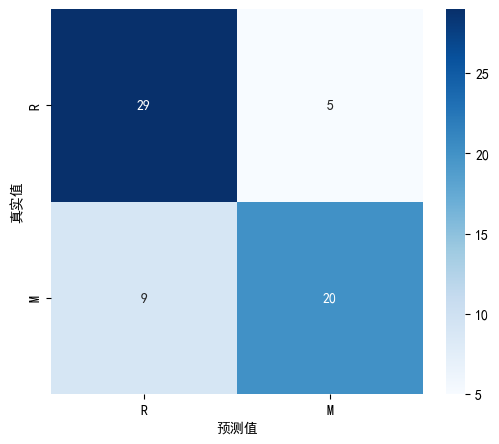

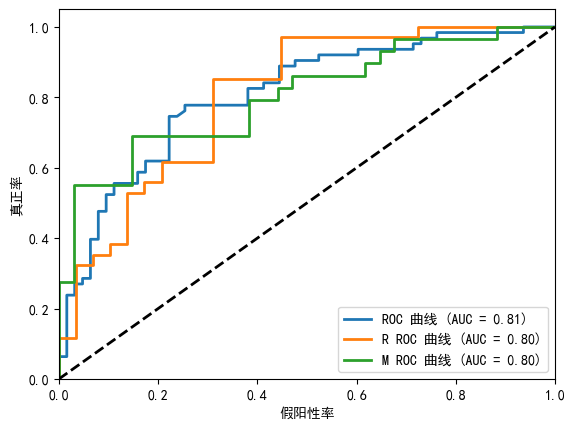

In [9]:
for model in models:
    model_name = model['name']
    params = model['params']
    print(f"\n{'='*60}\n")

    svc = SVC(**params)
    svc.fit(X_train, np.ravel(y_train))
    y_pred = svc.predict(X_test)
    y_score = svc.predict_proba(X_test)

    # 评估模型
    evaluate_model(y_test, y_pred, model_name)
    plot_confusion_matrix(y_test, y_pred, model_name)
    plot_roc_curve(y_test, y_score, model_name)



模型：拉普拉斯核 SVM
              precision    recall  f1-score   support

           R       0.54      1.00      0.70        34
           M       0.00      0.00      0.00        29

    accuracy                           0.54        63
   macro avg       0.27      0.50      0.35        63
weighted avg       0.29      0.54      0.38        63



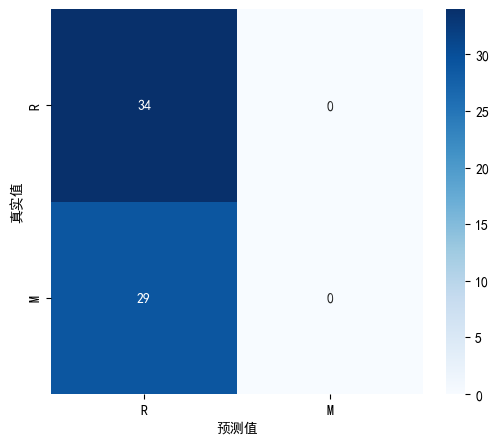

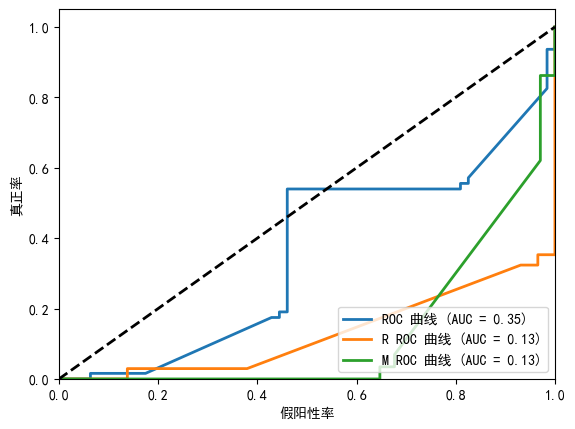

In [10]:
# 训练和评估拉普拉斯核 SVM
print(f"\n{'='*60}\n")

# 计算拉普拉斯核矩阵
gamma = 1.0
K_train = laplacian_kernel(X_train, X_train, gamma=gamma)
K_test = laplacian_kernel(X_test, X_train, gamma=gamma)

svc = SVC(kernel='precomputed', probability=True)
svc.fit(K_train, np.ravel(y_train))
y_pred = svc.predict(K_test)
y_score = svc.predict_proba(K_test)

# 评估模型
evaluate_model(y_test, y_pred, '拉普拉斯核 SVM')
plot_confusion_matrix(y_test, y_pred, '拉普拉斯核 SVM')
plot_roc_curve(y_test, y_score, '拉普拉斯核 SVM')